In [1]:
import pandas as pd
import numpy as np
from optuna.integration import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import japanize_matplotlib
import optuna.integration.lightgbm as lgb_tune
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/suumo_dum.csv")

In [3]:
df.head()

,price,age,manage,sikikin,reikin,deposit,sikibiki,bus,walk,time,...,address_東京都江戸川区平井６,address_東京都江戸川区平井７,address_東京都江東区亀戸２,address_東京都江東区亀戸３,address_東京都江東区亀戸４,address_東京都江東区亀戸５,address_東京都葛飾区立石２,address_東京都葛飾区立石４,address_東京都葛飾区西新小岩５,name
0,7.30,6.0,15000.0,0.0,1.0,0.0,0.0,0,1,6.0,...,0,0,0,0,0,0,0,0,0,アルテシモ サリーレ
1,7.40,8.0,4000.0,0.0,0.0,0.0,0.0,0,1,8.0,...,0,0,0,0,0,0,0,0,0,Forbitezza
2,7.40,8.0,4000.0,0.0,0.0,0.0,0.0,0,1,4.0,...,0,0,0,0,0,0,0,0,0,京成押上線 押上駅 3階建 築8年
3,5.65,6.0,3500.0,0.0,1.0,0.0,0.0,0,1,8.0,...,0,0,0,0,0,0,0,0,0,東武伊勢崎線 押上駅 2階建 築6年
4,9.70,5.0,10000.0,1.0,1.0,0.0,0.0,0,1,4.0,...,0,0,0,0,0,0,0,0,0,京成押上線 京成曳舟駅 5階建 築5年


In [4]:
df = df.drop("name",axis=1)

データをトレーニング用データと検証用データに分割する

In [5]:
train, test = train_test_split(df, random_state=10, test_size=0.20)

In [6]:
X = train[[col for col in train.columns if col not in ['price']]]
y = train["price"]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=10, test_size=0.20)

In [7]:
trains = lgb.Dataset(X_train, y_train)
valids = lgb.Dataset(X_val, y_val, reference=trains)

In [8]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse'
}


model_tune = lgb_tune.train(
    params, trains, valid_sets=[trains, valids], 
    num_boost_round=5000,
    verbose_eval=100, 
    early_stopping_rounds=100
)

[I 2022-01-25 09:23:22,266] A new study created in memory with name: no-name-0d1570a9-dc65-4a1f-a825-8e129cd6fc34
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.431132	valid_1's rmse: 0.493596
[200]	valid_0's rmse: 0.352895	valid_1's rmse: 0.430764
[300]	valid_0's rmse: 0.311948	valid_1's rmse: 0.403885
[400]	valid_0's rmse: 0.285351	valid_1's rmse: 0.386999
[500]	valid_0's rmse: 0.265203	valid_1's rmse: 0.374347
[600]	valid_0's rmse: 0.249057	valid_1's rmse: 0.364229
[700]	valid_0's rmse: 0.236949	valid_1's rmse: 0.358013
[800]	valid_0's rmse: 0.226112	valid_1's rmse: 0.353182
[900]	valid_0's rmse: 0.217749	valid_1's rmse: 0.349185
[1000]	valid_0's rmse: 0

feature_fraction, val_score: 0.327680:  14%|#4        | 1/7 [00:05<00:31,  5.18s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.402943	valid_1's rmse: 0.45252
[200]	valid_0's rmse: 0.325868	valid_1's rmse: 0.399595
[300]	valid_0's rmse: 0.285181	valid_1's rmse: 0.372251
[400]	valid_0's rmse: 0.256685	valid_1's rmse: 0.357407
[500]	valid_0's rmse: 0.235172	valid_1's rmse: 0.346071
[600]	valid_0's rmse: 0.220122	valid_1's rmse: 0.339834
[700]	valid_0's rmse: 0.208444	valid_1's rmse: 0.334646
[800]	valid_0's rmse: 0.198483	valid_1's rmse: 0.331743
[900]	valid_0's rmse: 0.190253	valid_1's rmse: 0.329132
[1000]	valid_0's rmse: 0.

feature_fraction, val_score: 0.320582:  29%|##8       | 2/7 [00:08<00:19,  3.85s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.420168	valid_1's rmse: 0.481944
[200]	valid_0's rmse: 0.338478	valid_1's rmse: 0.417981
[300]	valid_0's rmse: 0.295205	valid_1's rmse: 0.388864
[400]	valid_0's rmse: 0.267959	valid_1's rmse: 0.372933
[500]	valid_0's rmse: 0.247188	valid_1's rmse: 0.362533
[600]	valid_0's rmse: 0.231581	valid_1's rmse: 0.354013
[700]	valid_0's rmse: 0.219293	valid_1's rmse: 0.348877
[800]	valid_0's rmse: 0.209551	valid_1's rmse: 0.344414
[900]	valid_0's rmse: 0.201544	valid_1's rmse: 0.340747
[1000]	valid_0's rmse: 0

feature_fraction, val_score: 0.320582:  43%|####2     | 3/7 [00:12<00:15,  3.93s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.40299	valid_1's rmse: 0.455486
[200]	valid_0's rmse: 0.323977	valid_1's rmse: 0.397852
[300]	valid_0's rmse: 0.281412	valid_1's rmse: 0.369873
[400]	valid_0's rmse: 0.253936	valid_1's rmse: 0.354821
[500]	valid_0's rmse: 0.234476	valid_1's rmse: 0.345295
[600]	valid_0's rmse: 0.220155	valid_1's rmse: 0.339288
[700]	valid_0's rmse: 0.208007	valid_1's rmse: 0.334823
[800]	valid_0's rmse: 0.198716	valid_1's rmse: 0.332587
[900]	valid_0's rmse: 0.191389	valid_1's rmse: 0.330476
[1000]	valid_0's rmse: 0.

feature_fraction, val_score: 0.320582:  57%|#####7    | 4/7 [00:14<00:09,  3.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.409808	valid_1's rmse: 0.468142
[200]	valid_0's rmse: 0.331747	valid_1's rmse: 0.410609
[300]	valid_0's rmse: 0.290606	valid_1's rmse: 0.383025
[400]	valid_0's rmse: 0.263908	valid_1's rmse: 0.365926
[500]	valid_0's rmse: 0.24384	valid_1's rmse: 0.353977
[600]	valid_0's rmse: 0.228312	valid_1's rmse: 0.346629
[700]	valid_0's rmse: 0.216286	valid_1's rmse: 0.340684
[800]	valid_0's rmse: 0.206187	valid_1's rmse: 0.336488
[900]	valid_0's rmse: 0.1982	valid_1's rmse: 0.334026
[1000]	valid_0's rmse: 0.19

feature_fraction, val_score: 0.320582:  71%|#######1  | 5/7 [00:17<00:06,  3.41s/it]

[2500]	valid_0's rmse: 0.144662	valid_1's rmse: 0.322831
Early stopping, best iteration is:
[2410]	valid_0's rmse: 0.146175	valid_1's rmse: 0.322696
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.406736	valid_1's rmse: 0.459632
[200]	valid_0's rmse: 0.325421	valid_1's rmse: 0.399397
[300]	valid_0's rmse: 0.284532	valid_1's rmse: 0.37218
[400]	valid_0's rmse: 0.257811	valid_1's rmse: 0.358181
[500]	valid_0's rmse: 0.237795	valid_1's rmse: 0.347789
[600]	valid_0's rmse: 0.222632	valid_1's rmse: 0.339493
[700]	valid_0's rmse: 0.210941	valid_1's rms

feature_fraction, val_score: 0.320582:  86%|########5 | 6/7 [00:20<00:03,  3.06s/it]

[1900]	valid_0's rmse: 0.153242	valid_1's rmse: 0.320838
Early stopping, best iteration is:
[1893]	valid_0's rmse: 0.15342	valid_1's rmse: 0.320769
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.421517	valid_1's rmse: 0.483073
[200]	valid_0's rmse: 0.339794	valid_1's rmse: 0.419749
[300]	valid_0's rmse: 0.297488	valid_1's rmse: 0.390255
[400]	valid_0's rmse: 0.271471	valid_1's rmse: 0.375339
[500]	valid_0's rmse: 0.251718	valid_1's rmse: 0.363251
[600]	valid_0's rmse: 0.23696	valid_1's rmse: 0.356091
[700]	valid_0's rmse: 0.224869	valid_1's rmse

num_leaves, val_score: 0.320582:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[2850]	valid_0's rmse: 0.145644	valid_1's rmse: 0.322795
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.228083	valid_1's rmse: 0.353906
[200]	valid_0's rmse: 0.177952	valid_1's rmse: 0.338165
[300]	valid_0's rmse: 0.15394	valid_1's rmse: 0.333107
[400]	valid_0's rmse: 0.140697	valid_1's rmse: 0.330671
[500]	valid_0's rmse: 0.130934	valid_1's rmse: 0.330386


num_leaves, val_score: 0.320582:   5%|5         | 1/20 [00:03<01:06,  3.51s/it]

[600]	valid_0's rmse: 0.126194	valid_1's rmse: 0.330473
Early stopping, best iteration is:
[502]	valid_0's rmse: 0.130801	valid_1's rmse: 0.330201
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.237847	valid_1's rmse: 0.357964
[200]	valid_0's rmse: 0.186279	valid_1's rmse: 0.340322
[300]	valid_0's rmse: 0.160934	valid_1's rmse: 0.334004
[400]	valid_0's rmse: 0.146737	valid_1's rmse: 0.33175
[500]	valid_0's rmse: 0.137041	valid_1's rmse: 0.331243
[600]	valid_0's rmse: 0.130555	valid_1's rmse: 0.331168
[700]	valid_0's rmse: 0.126262	valid_1's rmse:

num_leaves, val_score: 0.320582:  10%|#         | 2/20 [00:07<01:09,  3.84s/it]

Early stopping, best iteration is:
[681]	valid_0's rmse: 0.126991	valid_1's rmse: 0.330814
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.228083	valid_1's rmse: 0.353906
[200]	valid_0's rmse: 0.177952	valid_1's rmse: 0.338165
[300]	valid_0's rmse: 0.15394	valid_1's rmse: 0.333107
[400]	valid_0's rmse: 0.140697	valid_1's rmse: 0.330671
[500]	valid_0's rmse: 0.130934	valid_1's rmse: 0.330386


num_leaves, val_score: 0.320582:  15%|#5        | 3/20 [00:10<01:01,  3.63s/it]

[600]	valid_0's rmse: 0.126194	valid_1's rmse: 0.330473
Early stopping, best iteration is:
[502]	valid_0's rmse: 0.130801	valid_1's rmse: 0.330201
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.22636	valid_1's rmse: 0.361677
[200]	valid_0's rmse: 0.176033	valid_1's rmse: 0.346189
[300]	valid_0's rmse: 0.152002	valid_1's rmse: 0.341179
[400]	valid_0's rmse: 0.139007	valid_1's rmse: 0.339742
[500]	valid_0's rmse: 0.131143	valid_1's rmse: 0.339277
[600]	valid_0's rmse: 0.125661	valid_1's rmse: 0.338709
[700]	valid_0's rmse: 0.122005	valid_1's rmse:

num_leaves, val_score: 0.320582:  20%|##        | 4/20 [00:15<01:03,  4.00s/it]

Early stopping, best iteration is:
[647]	valid_0's rmse: 0.123702	valid_1's rmse: 0.338669
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.245312	valid_1's rmse: 0.361178
[200]	valid_0's rmse: 0.192507	valid_1's rmse: 0.33947
[300]	valid_0's rmse: 0.166473	valid_1's rmse: 0.331996
[400]	valid_0's rmse: 0.150547	valid_1's rmse: 0.329306
[500]	valid_0's rmse: 0.14015	valid_1's rmse: 0.328267
[600]	valid_0's rmse: 0.133816	valid_1's rmse: 0.327649
[700]	valid_0's rmse: 0.128876	valid_1's rmse: 0.327486
[800]	valid_0's rmse: 0.125295	valid_1's rmse: 

num_leaves, val_score: 0.320582:  25%|##5       | 5/20 [00:22<01:14,  4.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.228819	valid_1's rmse: 0.357348
[200]	valid_0's rmse: 0.1786	valid_1's rmse: 0.341461
[300]	valid_0's rmse: 0.155153	valid_1's rmse: 0.335087
[400]	valid_0's rmse: 0.141598	valid_1's rmse: 0.33188
[500]	valid_0's rmse: 0.132552	valid_1's rmse: 0.331096


num_leaves, val_score: 0.320582:  30%|###       | 6/20 [00:25<01:01,  4.37s/it]

Early stopping, best iteration is:
[497]	valid_0's rmse: 0.132734	valid_1's rmse: 0.331016
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.290762	valid_1's rmse: 0.383939
[200]	valid_0's rmse: 0.230583	valid_1's rmse: 0.352389
[300]	valid_0's rmse: 0.200111	valid_1's rmse: 0.33993
[400]	valid_0's rmse: 0.179789	valid_1's rmse: 0.333631
[500]	valid_0's rmse: 0.166159	valid_1's rmse: 0.330031
[600]	valid_0's rmse: 0.156852	valid_1's rmse: 0.328197
[700]	valid_0's rmse: 0.149488	valid_1's rmse: 0.326859
[800]	valid_0's rmse: 0.143858	valid_1's rmse:

num_leaves, val_score: 0.320582:  35%|###5      | 7/20 [00:28<00:50,  3.87s/it]

[1000]	valid_0's rmse: 0.135188	valid_1's rmse: 0.325254
Early stopping, best iteration is:
[921]	valid_0's rmse: 0.138179	valid_1's rmse: 0.324872
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.26201	valid_1's rmse: 0.362196
[200]	valid_0's rmse: 0.207362	valid_1's rmse: 0.33731
[300]	valid_0's rmse: 0.179846	valid_1's rmse: 0.328752
[400]	valid_0's rmse: 0.162923	valid_1's rmse: 0.325
[500]	valid_0's rmse: 0.151385	valid_1's rmse: 0.323136
[600]	valid_0's rmse: 0.143437	valid_1's rmse: 0.321777
[700]	valid_0's rmse: 0.137662	valid_1's rmse: 0.

num_leaves, val_score: 0.320582:  40%|####      | 8/20 [00:32<00:47,  3.99s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.302501	valid_1's rmse: 0.393097
[200]	valid_0's rmse: 0.239561	valid_1's rmse: 0.357457
[300]	valid_0's rmse: 0.207909	valid_1's rmse: 0.341804
[400]	valid_0's rmse: 0.188103	valid_1's rmse: 0.334645
[500]	valid_0's rmse: 0.174265	valid_1's rmse: 0.331085
[600]	valid_0's rmse: 0.164519	valid_1's rmse: 0.329277
[700]	valid_0's rmse: 0.15663	valid_1's rmse: 0.328226
[800]	valid_0's rmse: 0.150136	valid_1's rmse: 0.327195
[900]	valid_0's rmse: 0.144997	valid_1's rmse: 0.326653
[1000]	valid_0's rmse: 0.

num_leaves, val_score: 0.320582:  45%|####5     | 9/20 [00:35<00:39,  3.63s/it]

Early stopping, best iteration is:
[1122]	valid_0's rmse: 0.13622	valid_1's rmse: 0.326245
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.243733	valid_1's rmse: 0.357531
[200]	valid_0's rmse: 0.193056	valid_1's rmse: 0.339035
[300]	valid_0's rmse: 0.166868	valid_1's rmse: 0.331941
[400]	valid_0's rmse: 0.151461	valid_1's rmse: 0.329869
[500]	valid_0's rmse: 0.141382	valid_1's rmse: 0.32879
[600]	valid_0's rmse: 0.13466	valid_1's rmse: 0.327824
[700]	valid_0's rmse: 0.130022	valid_1's rmse: 0.327139
[800]	valid_0's rmse: 0.126393	valid_1's rmse: 

num_leaves, val_score: 0.320582:  50%|#####     | 10/20 [00:40<00:40,  4.03s/it]

Early stopping, best iteration is:
[849]	valid_0's rmse: 0.12484	valid_1's rmse: 0.326864
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.645465	valid_1's rmse: 0.656101
[200]	valid_0's rmse: 0.55564	valid_1's rmse: 0.575423
[300]	valid_0's rmse: 0.500881	valid_1's rmse: 0.53014
[400]	valid_0's rmse: 0.468738	valid_1's rmse: 0.506876
[500]	valid_0's rmse: 0.443857	valid_1's rmse: 0.488125
[600]	valid_0's rmse: 0.421936	valid_1's rmse: 0.470423
[700]	valid_0's rmse: 0.402901	valid_1's rmse: 0.455444
[800]	valid_0's rmse: 0.387183	valid_1's rmse: 0

num_leaves, val_score: 0.320582:  55%|#####5    | 11/20 [00:42<00:31,  3.47s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.285043	valid_1's rmse: 0.377427
[200]	valid_0's rmse: 0.22579	valid_1's rmse: 0.347947
[300]	valid_0's rmse: 0.195656	valid_1's rmse: 0.333418
[400]	valid_0's rmse: 0.17706	valid_1's rmse: 0.326211
[500]	valid_0's rmse: 0.163948	valid_1's rmse: 0.322742
[600]	valid_0's rmse: 0.154415	valid_1's rmse: 0.321255
[700]	valid_0's rmse: 0.147294	valid_1's rmse: 0.320034
[800]	valid_0's rmse: 0.141699	valid_1's rmse: 0.319413
[900]	valid_0's rmse: 0.137294	valid_1's rmse: 0.318984
[1000]	valid_0's rmse: 0.1

num_leaves, val_score: 0.318630:  60%|######    | 12/20 [00:45<00:26,  3.28s/it]

[1100]	valid_0's rmse: 0.130875	valid_1's rmse: 0.318907
Early stopping, best iteration is:
[1008]	valid_0's rmse: 0.13338	valid_1's rmse: 0.31863
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275733	valid_1's rmse: 0.361178
[200]	valid_0's rmse: 0.217856	valid_1's rmse: 0.334479
[300]	valid_0's rmse: 0.188066	valid_1's rmse: 0.323446
[400]	valid_0's rmse: 0.169868	valid_1's rmse: 0.318124
[500]	valid_0's rmse: 0.158052	valid_1's rmse: 0.315691
[600]	valid_0's rmse: 0.149459	valid_1's rmse: 0.314795
[700]	valid_0's rmse: 0.143141	valid_1's rmse

num_leaves, val_score: 0.313426:  65%|######5   | 13/20 [00:48<00:21,  3.13s/it]

[900]	valid_0's rmse: 0.133947	valid_1's rmse: 0.313639
Early stopping, best iteration is:
[819]	valid_0's rmse: 0.137109	valid_1's rmse: 0.313426
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.357735	valid_1's rmse: 0.420406
[200]	valid_0's rmse: 0.285277	valid_1's rmse: 0.372249
[300]	valid_0's rmse: 0.247684	valid_1's rmse: 0.349613
[400]	valid_0's rmse: 0.225017	valid_1's rmse: 0.338932
[500]	valid_0's rmse: 0.207011	valid_1's rmse: 0.33128
[600]	valid_0's rmse: 0.19379	valid_1's rmse: 0.325489
[700]	valid_0's rmse: 0.184135	valid_1's rmse: 

num_leaves, val_score: 0.313426:  70%|#######   | 14/20 [00:50<00:17,  2.87s/it]

Early stopping, best iteration is:
[1491]	valid_0's rmse: 0.145009	valid_1's rmse: 0.316146
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.447717	valid_1's rmse: 0.495452
[200]	valid_0's rmse: 0.365229	valid_1's rmse: 0.431414
[300]	valid_0's rmse: 0.319749	valid_1's rmse: 0.401061
[400]	valid_0's rmse: 0.290964	valid_1's rmse: 0.382889
[500]	valid_0's rmse: 0.267343	valid_1's rmse: 0.368868
[600]	valid_0's rmse: 0.249846	valid_1's rmse: 0.35848
[700]	valid_0's rmse: 0.236737	valid_1's rmse: 0.350652
[800]	valid_0's rmse: 0.225134	valid_1's rmse

num_leaves, val_score: 0.313426:  75%|#######5  | 15/20 [00:52<00:13,  2.71s/it]

Early stopping, best iteration is:
[2385]	valid_0's rmse: 0.157502	valid_1's rmse: 0.327382
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.344731	valid_1's rmse: 0.411851
[200]	valid_0's rmse: 0.274127	valid_1's rmse: 0.370551
[300]	valid_0's rmse: 0.236592	valid_1's rmse: 0.349403
[400]	valid_0's rmse: 0.212121	valid_1's rmse: 0.338235
[500]	valid_0's rmse: 0.196139	valid_1's rmse: 0.333296
[600]	valid_0's rmse: 0.184467	valid_1's rmse: 0.329138
[700]	valid_0's rmse: 0.175125	valid_1's rmse: 0.326804
[800]	valid_0's rmse: 0.167787	valid_1's rms

num_leaves, val_score: 0.313426:  80%|########  | 16/20 [00:54<00:10,  2.54s/it]

[1300]	valid_0's rmse: 0.144298	valid_1's rmse: 0.322298
Early stopping, best iteration is:
[1224]	valid_0's rmse: 0.146898	valid_1's rmse: 0.322163
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.356532	valid_1's rmse: 0.418039
[200]	valid_0's rmse: 0.286802	valid_1's rmse: 0.373142
[300]	valid_0's rmse: 0.249175	valid_1's rmse: 0.350908
[400]	valid_0's rmse: 0.223644	valid_1's rmse: 0.33891
[500]	valid_0's rmse: 0.205794	valid_1's rmse: 0.332103
[600]	valid_0's rmse: 0.192978	valid_1's rmse: 0.327598
[700]	valid_0's rmse: 0.183188	valid_1's rms

num_leaves, val_score: 0.313426:  85%|########5 | 17/20 [00:57<00:07,  2.52s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.262978	valid_1's rmse: 0.365378
[200]	valid_0's rmse: 0.20665	valid_1's rmse: 0.339754
[300]	valid_0's rmse: 0.178043	valid_1's rmse: 0.329795
[400]	valid_0's rmse: 0.161064	valid_1's rmse: 0.32609
[500]	valid_0's rmse: 0.149965	valid_1's rmse: 0.32429
[600]	valid_0's rmse: 0.142634	valid_1's rmse: 0.323615
[700]	valid_0's rmse: 0.136865	valid_1's rmse: 0.323084
[800]	valid_0's rmse: 0.132486	valid_1's rmse: 0.322845


num_leaves, val_score: 0.313426:  90%|######### | 18/20 [01:00<00:05,  2.65s/it]

Early stopping, best iteration is:
[797]	valid_0's rmse: 0.132604	valid_1's rmse: 0.322785
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.347399	valid_1's rmse: 0.415198
[200]	valid_0's rmse: 0.274551	valid_1's rmse: 0.370166
[300]	valid_0's rmse: 0.240087	valid_1's rmse: 0.351644
[400]	valid_0's rmse: 0.216237	valid_1's rmse: 0.34073
[500]	valid_0's rmse: 0.200126	valid_1's rmse: 0.334651
[600]	valid_0's rmse: 0.188393	valid_1's rmse: 0.330263
[700]	valid_0's rmse: 0.178867	valid_1's rmse: 0.327523
[800]	valid_0's rmse: 0.171528	valid_1's rmse:

num_leaves, val_score: 0.313426:  95%|#########5| 19/20 [01:02<00:02,  2.53s/it]

[1300]	valid_0's rmse: 0.146293	valid_1's rmse: 0.322478
Early stopping, best iteration is:
[1271]	valid_0's rmse: 0.147309	valid_1's rmse: 0.322239
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.273583	valid_1's rmse: 0.367206
[200]	valid_0's rmse: 0.215656	valid_1's rmse: 0.339964
[300]	valid_0's rmse: 0.186357	valid_1's rmse: 0.330379
[400]	valid_0's rmse: 0.167957	valid_1's rmse: 0.325966
[500]	valid_0's rmse: 0.156122	valid_1's rmse: 0.323689
[600]	valid_0's rmse: 0.147647	valid_1's rmse: 0.322324
[700]	valid_0's rmse: 0.141494	valid_1's rm

bagging, val_score: 0.313426:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.291532	valid_1's rmse: 0.38522
[200]	valid_0's rmse: 0.22743	valid_1's rmse: 0.357708
[300]	valid_0's rmse: 0.194032	valid_1's rmse: 0.345258
[400]	valid_0's rmse: 0.174026	valid_1's rmse: 0.339791
[500]	valid_0's rmse: 0.160411	valid_1's rmse: 0.337483
[600]	valid_0's rmse: 0.151334	valid_1's rmse: 0.335557
[700]	valid_0's rmse: 0.144139	valid_1's rmse: 0.335107
[800]	valid_0's rmse: 0.138754	valid_1's rmse: 0.334223
[900]	valid_0's rmse: 0.134577	valid_1's rmse: 0.333703
[1000]	valid_0's rmse: 0.1

bagging, val_score: 0.313426:  10%|#         | 1/10 [00:04<00:43,  4.78s/it]

[1200]	valid_0's rmse: 0.126746	valid_1's rmse: 0.333621
Early stopping, best iteration is:
[1108]	valid_0's rmse: 0.128673	valid_1's rmse: 0.333244
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.299893	valid_1's rmse: 0.393247
[200]	valid_0's rmse: 0.238486	valid_1's rmse: 0.362858
[300]	valid_0's rmse: 0.205445	valid_1's rmse: 0.351172
[400]	valid_0's rmse: 0.184066	valid_1's rmse: 0.344587
[500]	valid_0's rmse: 0.169689	valid_1's rmse: 0.341892
[600]	valid_0's rmse: 0.159298	valid_1's rmse: 0.339295
[700]	valid_0's rmse: 0.15151	valid_1's rms

bagging, val_score: 0.313426:  20%|##        | 2/10 [00:09<00:35,  4.46s/it]

[800]	valid_0's rmse: 0.145268	valid_1's rmse: 0.336957
Early stopping, best iteration is:
[726]	valid_0's rmse: 0.149948	valid_1's rmse: 0.335948
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000939 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.344392	valid_1's rmse: 0.400498
[200]	valid_0's rmse: 0.278744	valid_1's rmse: 0.371866
[300]	valid_0's rmse: 0.245309	valid_1's rmse: 0.359686
[400]	valid_0's rmse: 0.221023	valid_1's rmse: 0.350991
[500]	valid_0's rmse: 0.204397	valid_1's rmse: 0.34613
[600]	valid_0's rmse: 0.190181	valid_1's rmse: 0.343824
[700]	valid_0's rmse: 0.1798	valid_1's rmse: 0

bagging, val_score: 0.313426:  30%|###       | 3/10 [00:13<00:32,  4.68s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.325808	valid_1's rmse: 0.399436
[200]	valid_0's rmse: 0.261353	valid_1's rmse: 0.370546
[300]	valid_0's rmse: 0.22901	valid_1's rmse: 0.353317
[400]	valid_0's rmse: 0.206741	valid_1's rmse: 0.348596
[500]	valid_0's rmse: 0.189939	valid_1's rmse: 0.342633
[600]	valid_0's rmse: 0.178276	valid_1's rmse: 0.340431
[700]	valid_0's rmse: 0.168231	valid_1's rmse: 0.337587
[800]	valid_0's rmse: 0.159703	valid_1's rmse: 0.333971


bagging, val_score: 0.313426:  40%|####      | 4/10 [00:17<00:24,  4.13s/it]

Early stopping, best iteration is:
[791]	valid_0's rmse: 0.160334	valid_1's rmse: 0.333755
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.302286	valid_1's rmse: 0.394601
[200]	valid_0's rmse: 0.236424	valid_1's rmse: 0.363166
[300]	valid_0's rmse: 0.205447	valid_1's rmse: 0.354107
[400]	valid_0's rmse: 0.185735	valid_1's rmse: 0.34656
[500]	valid_0's rmse: 0.169682	valid_1's rmse: 0.342204
[600]	valid_0's rmse: 0.159399	valid_1's rmse: 0.341167
[700]	valid_0's rmse: 0.151501	valid_1's rmse: 0.340641
[800]	valid_0's rmse: 0.146098	valid_1's rmse:

bagging, val_score: 0.313426:  50%|#####     | 5/10 [00:20<00:19,  3.86s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.316436	valid_1's rmse: 0.398729
[200]	valid_0's rmse: 0.252871	valid_1's rmse: 0.372515
[300]	valid_0's rmse: 0.217012	valid_1's rmse: 0.35953
[400]	valid_0's rmse: 0.194262	valid_1's rmse: 0.350606
[500]	valid_0's rmse: 0.1785	valid_1's rmse: 0.348151
[600]	valid_0's rmse: 0.168218	valid_1's rmse: 0.346035
[700]	valid_0's rmse: 0.160464	valid_1's rmse: 0.34369
Early stopping, best iteration is:
[660]	valid_0's rmse: 0.163117	valid_1's rmse: 0.342938


bagging, val_score: 0.313426:  60%|######    | 6/10 [00:23<00:13,  3.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.331218	valid_1's rmse: 0.410365
[200]	valid_0's rmse: 0.268542	valid_1's rmse: 0.383696
[300]	valid_0's rmse: 0.234341	valid_1's rmse: 0.365457
[400]	valid_0's rmse: 0.213077	valid_1's rmse: 0.360436
[500]	valid_0's rmse: 0.195861	valid_1's rmse: 0.35664
[600]	valid_0's rmse: 0.183606	valid_1's rmse: 0.351374
[700]	valid_0's rmse: 0.174209	valid_1's rmse: 0.350883
[800]	valid_0's rmse: 0.167406	valid_1's rmse: 0.349569
[900]	valid_0's rmse: 0.161536	valid_1's rmse: 0.348731


bagging, val_score: 0.313426:  70%|#######   | 7/10 [00:28<00:11,  3.87s/it]

[1000]	valid_0's rmse: 0.156973	valid_1's rmse: 0.349053
Early stopping, best iteration is:
[915]	valid_0's rmse: 0.161064	valid_1's rmse: 0.347603
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.303214	valid_1's rmse: 0.388732
[200]	valid_0's rmse: 0.241201	valid_1's rmse: 0.361509
[300]	valid_0's rmse: 0.209689	valid_1's rmse: 0.349104
[400]	valid_0's rmse: 0.189156	valid_1's rmse: 0.345391
[500]	valid_0's rmse: 0.175126	valid_1's rmse: 0.342386
[600]	valid_0's rmse: 0.163854	valid_1's rmse: 0.338218
[700]	valid_0's rmse: 0.154986	valid_1's rms

bagging, val_score: 0.313426:  80%|########  | 8/10 [00:33<00:08,  4.28s/it]

[1000]	valid_0's rmse: 0.138915	valid_1's rmse: 0.333836
Early stopping, best iteration is:
[910]	valid_0's rmse: 0.142539	valid_1's rmse: 0.333142
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.312309	valid_1's rmse: 0.389436
[200]	valid_0's rmse: 0.249771	valid_1's rmse: 0.359196
[300]	valid_0's rmse: 0.218554	valid_1's rmse: 0.351489
[400]	valid_0's rmse: 0.19827	valid_1's rmse: 0.346396
[500]	valid_0's rmse: 0.182008	valid_1's rmse: 0.339586
[600]	valid_0's rmse: 0.16969	valid_1's rmse: 0.33778
[700]	valid_0's rmse: 0.16199	valid_1's rmse: 0

bagging, val_score: 0.313426:  90%|######### | 9/10 [00:38<00:04,  4.45s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.274398	valid_1's rmse: 0.374041
[200]	valid_0's rmse: 0.215843	valid_1's rmse: 0.343955
[300]	valid_0's rmse: 0.185947	valid_1's rmse: 0.332578
[400]	valid_0's rmse: 0.168109	valid_1's rmse: 0.328878
[500]	valid_0's rmse: 0.156104	valid_1's rmse: 0.327339
[600]	valid_0's rmse: 0.147325	valid_1's rmse: 0.326401
[700]	valid_0's rmse: 0.14024	valid_1's rmse: 0.325868
[800]	valid_0's rmse: 0.134926	valid_1's rmse: 0.325251
[900]	valid_0's rmse: 0.130913	valid_1's rmse: 0.325221
[1000]	valid_0's rmse: 0.

feature_fraction_stage2, val_score: 0.313426:   0%|          | 0/3 [00:00<?, ?it/s]

[1200]	valid_0's rmse: 0.122841	valid_1's rmse: 0.325228
Early stopping, best iteration is:
[1120]	valid_0's rmse: 0.12459	valid_1's rmse: 0.324841
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.278713	valid_1's rmse: 0.376607
[200]	valid_0's rmse: 0.220978	valid_1's rmse: 0.346484
[300]	valid_0's rmse: 0.189099	valid_1's rmse: 0.334771
[400]	valid_0's rmse: 0.170812	valid_1's rmse: 0.329936
[500]	valid_0's rmse: 0.158502	valid_1's rmse: 0.327261
[600]	valid_0's rmse: 0.150187	valid_1's rmse: 0.325737
[700]	valid_0's rmse: 0.143607	valid_1's rms

feature_fraction_stage2, val_score: 0.313426:  33%|###3      | 1/3 [00:02<00:05,  2.89s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.276608	valid_1's rmse: 0.371211
[200]	valid_0's rmse: 0.218582	valid_1's rmse: 0.341456
[300]	valid_0's rmse: 0.189175	valid_1's rmse: 0.329725
[400]	valid_0's rmse: 0.171418	valid_1's rmse: 0.32444
[500]	valid_0's rmse: 0.158822	valid_1's rmse: 0.321126
[600]	valid_0's rmse: 0.149686	valid_1's rmse: 0.319352
[700]	valid_0's rmse: 0.14321	valid_1's rmse: 0.318652
[800]	valid_0's rmse: 0.137686	valid_1's rmse: 0.31817
[900]	valid_0's rmse: 0.133645	valid_1's rmse: 0.317841
[1000]	valid_0's rmse: 0.13

feature_fraction_stage2, val_score: 0.313426:  67%|######6   | 2/3 [00:06<00:03,  3.39s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.274249	valid_1's rmse: 0.379113
[200]	valid_0's rmse: 0.215707	valid_1's rmse: 0.349391
[300]	valid_0's rmse: 0.187292	valid_1's rmse: 0.33887
[400]	valid_0's rmse: 0.169234	valid_1's rmse: 0.334717
[500]	valid_0's rmse: 0.15779	valid_1's rmse: 0.332293
[600]	valid_0's rmse: 0.149282	valid_1's rmse: 0.331214
[700]	valid_0's rmse: 0.142719	valid_1's rmse: 0.33098
[800]	valid_0's rmse: 0.137649	valid_1's rmse: 0.330744


regularization_factors, val_score: 0.313426:   0%|          | 0/20 [00:00<?, ?it/s]

Early stopping, best iteration is:
[782]	valid_0's rmse: 0.138502	valid_1's rmse: 0.330656
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.278409	valid_1's rmse: 0.374013
[200]	valid_0's rmse: 0.219399	valid_1's rmse: 0.344436
[300]	valid_0's rmse: 0.189781	valid_1's rmse: 0.331946
[400]	valid_0's rmse: 0.171092	valid_1's rmse: 0.325986
[500]	valid_0's rmse: 0.158824	valid_1's rmse: 0.322865
[600]	valid_0's rmse: 0.150275	valid_1's rmse: 0.321393
[700]	valid_0's rmse: 0.143694	valid_1's rmse: 0.320688
[800]	valid_0's rmse: 0.138686	valid_1's rmse

regularization_factors, val_score: 0.313426:   5%|5         | 1/20 [00:04<01:31,  4.80s/it]

Early stopping, best iteration is:
[1077]	valid_0's rmse: 0.129147	valid_1's rmse: 0.319835
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.278293	valid_1's rmse: 0.370824
[200]	valid_0's rmse: 0.219865	valid_1's rmse: 0.343197
[300]	valid_0's rmse: 0.190411	valid_1's rmse: 0.331492
[400]	valid_0's rmse: 0.171547	valid_1's rmse: 0.326289
[500]	valid_0's rmse: 0.159038	valid_1's rmse: 0.323113
[600]	valid_0's rmse: 0.149947	valid_1's rmse: 0.321559
[700]	valid_0's rmse: 0.143372	valid_1's rmse: 0.320491
[800]	valid_0's rmse: 0.138425	valid_1's rms

regularization_factors, val_score: 0.313426:  10%|#         | 2/20 [00:09<01:21,  4.55s/it]

Early stopping, best iteration is:
[792]	valid_0's rmse: 0.138801	valid_1's rmse: 0.319824
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.278227	valid_1's rmse: 0.37072
[200]	valid_0's rmse: 0.219883	valid_1's rmse: 0.341251
[300]	valid_0's rmse: 0.189218	valid_1's rmse: 0.329158
[400]	valid_0's rmse: 0.170628	valid_1's rmse: 0.323404
[500]	valid_0's rmse: 0.158206	valid_1's rmse: 0.320105
[600]	valid_0's rmse: 0.149209	valid_1's rmse: 0.318363
[700]	valid_0's rmse: 0.142385	valid_1's rmse: 0.316993


regularization_factors, val_score: 0.313426:  15%|#5        | 3/20 [00:12<01:07,  3.99s/it]

[800]	valid_0's rmse: 0.137306	valid_1's rmse: 0.316982
Early stopping, best iteration is:
[711]	valid_0's rmse: 0.141814	valid_1's rmse: 0.316862
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.279645	valid_1's rmse: 0.368423
[200]	valid_0's rmse: 0.219937	valid_1's rmse: 0.338776
[300]	valid_0's rmse: 0.189706	valid_1's rmse: 0.327718
[400]	valid_0's rmse: 0.171651	valid_1's rmse: 0.323323
[500]	valid_0's rmse: 0.159304	valid_1's rmse: 0.320667
[600]	valid_0's rmse: 0.150386	valid_1's rmse: 0.320069
[700]	valid_0's rmse: 0.14391	valid_1's rmse:

regularization_factors, val_score: 0.313426:  20%|##        | 4/20 [00:15<00:56,  3.51s/it]

[800]	valid_0's rmse: 0.138732	valid_1's rmse: 0.31964
Early stopping, best iteration is:
[737]	valid_0's rmse: 0.14176	valid_1's rmse: 0.319495
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.278131	valid_1's rmse: 0.372963
[200]	valid_0's rmse: 0.219758	valid_1's rmse: 0.343681
[300]	valid_0's rmse: 0.189366	valid_1's rmse: 0.331218
[400]	valid_0's rmse: 0.170151	valid_1's rmse: 0.325614
[500]	valid_0's rmse: 0.158573	valid_1's rmse: 0.322477
[600]	valid_0's rmse: 0.150197	valid_1's rmse: 0.32054
[700]	valid_0's rmse: 0.143742	valid_1's rmse: 0

regularization_factors, val_score: 0.313426:  25%|##5       | 5/20 [00:19<00:54,  3.63s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.302016	valid_1's rmse: 0.377407
[200]	valid_0's rmse: 0.245387	valid_1's rmse: 0.346793
[300]	valid_0's rmse: 0.218749	valid_1's rmse: 0.336458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	valid_0's rmse: 0.205304	valid_1's rmse: 0.331651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

regularization_factors, val_score: 0.313426:  30%|###       | 6/20 [00:21<00:43,  3.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.280703	valid_1's rmse: 0.374601
[200]	valid_0's rmse: 0.219312	valid_1's rmse: 0.341999
[300]	valid_0's rmse: 0.189866	valid_1's rmse: 0.331928
[400]	valid_0's rmse: 0.170924	valid_1's rmse: 0.326274
[500]	valid_0's rmse: 0.158963	valid_1's rmse: 0.323285
[600]	valid_0's rmse: 0.150397	valid_1's rmse: 0.321656
[700]	valid_0's rmse: 0.143665	valid_1's rmse: 0.320843
[800]	valid_0's rmse: 0.138473	valid_1's rmse: 0.32067


regularization_factors, val_score: 0.313426:  35%|###5      | 7/20 [00:24<00:39,  3.07s/it]

Early stopping, best iteration is:
[764]	valid_0's rmse: 0.140115	valid_1's rmse: 0.320489
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.296034	valid_1's rmse: 0.379351
[200]	valid_0's rmse: 0.242918	valid_1's rmse: 0.353793
[300]	valid_0's rmse: 0.218085	valid_1's rmse: 0.343068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

regularization_factors, val_score: 0.313426:  40%|####      | 8/20 [00:26<00:34,  2.87s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[100]	valid_0's rmse: 0.317228	valid_1's rmse: 0.389641
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

regularization_factors, val_score: 0.313426:  45%|####5     | 9/20 [00:27<00:25,  2.34s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[100]	valid_0's rmse: 0.2802	valid_1's rmse: 0.37739
[200]	valid_0's rmse: 0.222436	valid_1's rmse: 0.347317
[300]	valid_0's rmse: 0.191667	valid_1's rmse: 0.335587
[400]	valid_0's rmse: 0.173318	valid_1's rmse: 0.33021
[500]	valid_0's rmse: 0.160832	valid_1's rmse: 0.327467
[600]	valid_0's rmse: 0.151895	valid_1's rmse: 0.326297
[700]	valid_0's rmse: 0.14523	valid_1's rmse: 0.325374
[800]	valid_0's rmse: 0.140009	valid_1's rmse: 0.324558
[900]	valid_0's rmse: 0.135821	valid_1's rmse: 0.324404
[1000]	valid_0's rmse: 0.132423	valid_1's rmse: 0.324429
[1100]	valid_0's rmse: 0.129748	valid_1's rmse: 0.32417


regularization_factors, val_score: 0.313426:  50%|#####     | 10/20 [00:31<00:29,  2.90s/it]

Early stopping, best iteration is:
[1093]	valid_0's rmse: 0.12993	valid_1's rmse: 0.324141
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.27698	valid_1's rmse: 0.370654
[200]	valid_0's rmse: 0.218147	valid_1's rmse: 0.343085
[300]	valid_0's rmse: 0.187741	valid_1's rmse: 0.331275
[400]	valid_0's rmse: 0.169385	valid_1's rmse: 0.325871
[500]	valid_0's rmse: 0.156817	valid_1's rmse: 0.323511
[600]	valid_0's rmse: 0.148448	valid_1's rmse: 0.321793
[700]	valid_0's rmse: 0.142058	valid_1's rmse: 0.320945
[800]	valid_0's rmse: 0.137128	valid_1's rmse:

regularization_factors, val_score: 0.313426:  55%|#####5    | 11/20 [00:35<00:27,  3.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.279689	valid_1's rmse: 0.375963
[200]	valid_0's rmse: 0.222784	valid_1's rmse: 0.347033
[300]	valid_0's rmse: 0.191885	valid_1's rmse: 0.334986
[400]	valid_0's rmse: 0.172711	valid_1's rmse: 0.329889
[500]	valid_0's rmse: 0.160127	valid_1's rmse: 0.326921
[600]	valid_0's rmse: 0.151562	valid_1's rmse: 0.325066
[700]	valid_0's rmse: 0.144629	valid_1's rmse: 0.323927
[800]	valid_0's rmse: 0.13915	valid_1's rmse: 0.32335
[900]	valid_0's rmse: 0.135195	valid_1's rmse: 0.323066
[1000]	valid_0's rmse: 0.1

regularization_factors, val_score: 0.313426:  60%|######    | 12/20 [00:38<00:24,  3.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275945	valid_1's rmse: 0.366048
[200]	valid_0's rmse: 0.218095	valid_1's rmse: 0.337216
[300]	valid_0's rmse: 0.189549	valid_1's rmse: 0.326608
[400]	valid_0's rmse: 0.170619	valid_1's rmse: 0.321231
[500]	valid_0's rmse: 0.158089	valid_1's rmse: 0.317922
[600]	valid_0's rmse: 0.149893	valid_1's rmse: 0.316398
[700]	valid_0's rmse: 0.143052	valid_1's rmse: 0.315759
[800]	valid_0's rmse: 0.137727	valid_1's rmse: 0.315564
[900]	valid_0's rmse: 0.133622	valid_1's rmse: 0.315516
Early stopping, best ite

regularization_factors, val_score: 0.313426:  65%|######5   | 13/20 [00:42<00:22,  3.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.278227	valid_1's rmse: 0.37072
[200]	valid_0's rmse: 0.220046	valid_1's rmse: 0.341037
[300]	valid_0's rmse: 0.190759	valid_1's rmse: 0.329279
[400]	valid_0's rmse: 0.171923	valid_1's rmse: 0.323711
[500]	valid_0's rmse: 0.158713	valid_1's rmse: 0.320456
[600]	valid_0's rmse: 0.150065	valid_1's rmse: 0.318833
[700]	valid_0's rmse: 0.14309	valid_1's rmse: 0.318175
[800]	valid_0's rmse: 0.137796	valid_1's rmse: 0.317854


regularization_factors, val_score: 0.313426:  70%|#######   | 14/20 [00:45<00:19,  3.25s/it]

Early stopping, best iteration is:
[795]	valid_0's rmse: 0.138005	valid_1's rmse: 0.31779
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275262	valid_1's rmse: 0.362428
[200]	valid_0's rmse: 0.218815	valid_1's rmse: 0.334658
[300]	valid_0's rmse: 0.188086	valid_1's rmse: 0.324603
[400]	valid_0's rmse: 0.169968	valid_1's rmse: 0.319566
[500]	valid_0's rmse: 0.157742	valid_1's rmse: 0.316991
[600]	valid_0's rmse: 0.148982	valid_1's rmse: 0.315473
[700]	valid_0's rmse: 0.142216	valid_1's rmse: 0.314218
[800]	valid_0's rmse: 0.137182	valid_1's rmse:

regularization_factors, val_score: 0.313426:  75%|#######5  | 15/20 [00:48<00:15,  3.15s/it]

[900]	valid_0's rmse: 0.133129	valid_1's rmse: 0.314013
Early stopping, best iteration is:
[806]	valid_0's rmse: 0.136921	valid_1's rmse: 0.313898
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275262	valid_1's rmse: 0.362428
[200]	valid_0's rmse: 0.217999	valid_1's rmse: 0.334303
[300]	valid_0's rmse: 0.188269	valid_1's rmse: 0.322982
[400]	valid_0's rmse: 0.170541	valid_1's rmse: 0.318184
[500]	valid_0's rmse: 0.158504	valid_1's rmse: 0.316516
[600]	valid_0's rmse: 0.149644	valid_1's rmse: 0.315755
[700]	valid_0's rmse: 0.142495	valid_1's rmse

regularization_factors, val_score: 0.313426:  80%|########  | 16/20 [00:50<00:12,  3.01s/it]

Early stopping, best iteration is:
[790]	valid_0's rmse: 0.137921	valid_1's rmse: 0.315149
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275262	valid_1's rmse: 0.362428
[200]	valid_0's rmse: 0.217999	valid_1's rmse: 0.334303
[300]	valid_0's rmse: 0.188269	valid_1's rmse: 0.322982
[400]	valid_0's rmse: 0.171157	valid_1's rmse: 0.318561
[500]	valid_0's rmse: 0.158773	valid_1's rmse: 0.316665
[600]	valid_0's rmse: 0.149837	valid_1's rmse: 0.315147
[700]	valid_0's rmse: 0.143207	valid_1's rmse: 0.314089
[800]	valid_0's rmse: 0.13785	valid_1's rmse:

regularization_factors, val_score: 0.313426:  85%|########5 | 17/20 [00:53<00:08,  2.99s/it]

Early stopping, best iteration is:
[889]	valid_0's rmse: 0.134016	valid_1's rmse: 0.313476
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275733	valid_1's rmse: 0.361178
[200]	valid_0's rmse: 0.217856	valid_1's rmse: 0.334479
[300]	valid_0's rmse: 0.188558	valid_1's rmse: 0.323808
[400]	valid_0's rmse: 0.170317	valid_1's rmse: 0.318681
[500]	valid_0's rmse: 0.158101	valid_1's rmse: 0.316241
[600]	valid_0's rmse: 0.149378	valid_1's rmse: 0.314616
[700]	valid_0's rmse: 0.14283	valid_1's rmse: 0.31397
[800]	valid_0's rmse: 0.137757	valid_1's rmse: 

regularization_factors, val_score: 0.313426:  90%|######### | 18/20 [00:56<00:05,  2.95s/it]

Early stopping, best iteration is:
[794]	valid_0's rmse: 0.138057	valid_1's rmse: 0.313747
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275296	valid_1's rmse: 0.362371
[200]	valid_0's rmse: 0.219174	valid_1's rmse: 0.334545
[300]	valid_0's rmse: 0.189227	valid_1's rmse: 0.323391
[400]	valid_0's rmse: 0.170656	valid_1's rmse: 0.317772
[500]	valid_0's rmse: 0.158731	valid_1's rmse: 0.314932
[600]	valid_0's rmse: 0.149993	valid_1's rmse: 0.313501
[700]	valid_0's rmse: 0.143417	valid_1's rmse: 0.312887
[800]	valid_0's rmse: 0.138251	valid_1's rmse

regularization_factors, val_score: 0.312161:  95%|#########5| 19/20 [00:59<00:03,  3.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275263	valid_1's rmse: 0.362428
[200]	valid_0's rmse: 0.219724	valid_1's rmse: 0.33419
[300]	valid_0's rmse: 0.189228	valid_1's rmse: 0.32253
[400]	valid_0's rmse: 0.170518	valid_1's rmse: 0.31843
[500]	valid_0's rmse: 0.158224	valid_1's rmse: 0.315641
[600]	valid_0's rmse: 0.149784	valid_1's rmse: 0.314548
[700]	valid_0's rmse: 0.142932	valid_1's rmse: 0.31387
[800]	valid_0's rmse: 0.137725	valid_1's rmse: 0.313532
[900]	valid_0's rmse: 0.133579	valid_1's rmse: 0.313442
[1000]	valid_0's rmse: 0.130

min_data_in_leaf, val_score: 0.312161:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.230791	valid_1's rmse: 0.358208
[200]	valid_0's rmse: 0.176502	valid_1's rmse: 0.336472
[300]	valid_0's rmse: 0.152413	valid_1's rmse: 0.330181
[400]	valid_0's rmse: 0.139114	valid_1's rmse: 0.327717
[500]	valid_0's rmse: 0.130757	valid_1's rmse: 0.327505
Early stopping, best iteration is:
[465]	valid_0's rmse: 0.133384	valid_1's rmse: 0.327209


min_data_in_leaf, val_score: 0.312161:  20%|##        | 1/5 [00:01<00:07,  1.93s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.247926	valid_1's rmse: 0.359016
[200]	valid_0's rmse: 0.190473	valid_1's rmse: 0.334179
[300]	valid_0's rmse: 0.16483	valid_1's rmse: 0.327021
[400]	valid_0's rmse: 0.150915	valid_1's rmse: 0.324762
[500]	valid_0's rmse: 0.141204	valid_1's rmse: 0.324356


min_data_in_leaf, val_score: 0.312161:  40%|####      | 2/5 [00:03<00:05,  1.84s/it]

[600]	valid_0's rmse: 0.134652	valid_1's rmse: 0.324368
Early stopping, best iteration is:
[553]	valid_0's rmse: 0.137188	valid_1's rmse: 0.324116
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.352004	valid_1's rmse: 0.406876
[200]	valid_0's rmse: 0.281974	valid_1's rmse: 0.373789
[300]	valid_0's rmse: 0.24458	valid_1's rmse: 0.364064
[400]	valid_0's rmse: 0.220433	valid_1's rmse: 0.356765
[500]	valid_0's rmse: 0.203224	valid_1's rmse: 0.351103
[600]	valid_0's rmse: 0.190363	valid_1's rmse: 0.347107
[700]	valid_0's rmse: 0.180326	valid_1's rmse:

min_data_in_leaf, val_score: 0.312161:  60%|######    | 3/5 [00:09<00:07,  3.79s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.291298	valid_1's rmse: 0.382929
[200]	valid_0's rmse: 0.232129	valid_1's rmse: 0.352726
[300]	valid_0's rmse: 0.201222	valid_1's rmse: 0.338033
[400]	valid_0's rmse: 0.182294	valid_1's rmse: 0.329397
[500]	valid_0's rmse: 0.168835	valid_1's rmse: 0.325776
[600]	valid_0's rmse: 0.15914	valid_1's rmse: 0.323672
[700]	valid_0's rmse: 0.151552	valid_1's rmse: 0.322545
[800]	valid_0's rmse: 0.145571	valid_1's rmse: 0.321904
[900]	valid_0's rmse: 0.140977	valid_1's rmse: 0.321255
[1000]	valid_0's rmse: 0.

min_data_in_leaf, val_score: 0.312161:  80%|########  | 4/5 [00:13<00:03,  3.66s/it]

[1100]	valid_0's rmse: 0.133731	valid_1's rmse: 0.321068
Early stopping, best iteration is:
[1021]	valid_0's rmse: 0.136277	valid_1's rmse: 0.320846
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	valid_0's rmse: 0.2

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1700]	valid_0's rmse: 0.184046	valid_1's rmse: 0.354339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2800]	valid_0's rmse: 0.153926	valid_1's rmse: 0.348848
[LightGBM] [Warning] No further splits with

min_data_in_leaf, val_score: 0.312161: 100%|##########| 5/5 [00:26<00:00,  5.39s/it]


In [9]:
model_tune.params

{'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'feature_pre_filter': False,
 'lambda_l1': 1.5097155509216186e-08,
 'lambda_l2': 2.819483029799579e-05,
 'num_leaves': 96,
 'feature_fraction': 1.0,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20,
 'num_iterations': 5000,
 'early_stopping_round': 100}

In [10]:
params = model_tune.params

In [11]:
light = lgb.train(
    params,
    trains, 
    valid_sets =[trains, valids], 
    num_boost_round=5000,
    verbose_eval=100,
    early_stopping_rounds=100
)

[I 2022-01-25 09:27:14,897] A new study created in memory with name: no-name-c9ec371e-c394-4f33-9ac8-46ca55b4f68e
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275296	valid_1's

feature_fraction, val_score: 0.312161:  14%|#4        | 1/7 [00:03<00:18,  3.15s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.282237	valid_1's

feature_fraction, val_score: 0.312161:  29%|##8       | 2/7 [00:05<00:14,  2.88s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.288069	valid_1's

feature_fraction, val_score: 0.312161:  43%|####2     | 3/7 [00:09<00:12,  3.17s/it]

[1200]	valid_0's rmse: 0.129595	valid_1's rmse: 0.333563
Early stopping, best iteration is:
[1105]	valid_0's rmse: 0.131769	valid_1's rmse: 0.333488
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightG

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.278003	valid_1's rmse: 0.378408
[200]	valid_0's rmse: 0.219998	valid_1's rmse: 0.349583
[300]	valid_0's rmse: 0.190094	valid_1's rmse: 0.337131
[400]	valid_0's rmse: 0.171879	valid_1's rmse: 0.330641
[500]	valid_0's rmse: 0.159599	valid_1's rmse: 0.326798
[600]	valid_0's rmse: 0.150144	valid_1's rmse: 0.324813
[700]	valid_0's rmse: 0.143453	valid_1's rmse: 0.323579
[800]	valid_0's rmse: 0.138134	valid_1's rmse: 0.323248
[900]	valid_0's rmse: 0.134152	valid_1's rmse: 0.323148


feature_fraction, val_score: 0.312161:  57%|#####7    | 4/7 [00:12<00:09,  3.04s/it]

Early stopping, best iteration is:
[887]	valid_0's rmse: 0.134636	valid_1's rmse: 0.322979
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training un

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.31227	valid_1's rmse: 0.420528
[200]	valid_0's rmse: 0.241666	valid_1's rmse: 0.376883
[300]	valid_0's rmse: 0.210262	valid_1's rmse: 0.361238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[400]	valid_0's rmse: 0.190389	valid_1's rmse: 0.352839
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[500]	valid_0's rmse: 0.177231	valid_1's rmse: 0.347983
[600]	valid_0's rmse: 0.167437	valid_1's rmse: 0.34497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[700]	valid_0's rmse: 0.160014	valid_1's rmse: 0.342774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[800]	valid_0's rmse: 0.154033	valid_1's rmse: 0.341422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's rmse: 0.149309	valid_1's rmse: 0.340606
[1000]	valid_0's rmse: 0.14546	valid_1's rmse: 0.339566
[1100]	valid_0's rmse: 0.141981	valid_1's rmse: 0.338827
[1200]	val

feature_fraction, val_score: 0.312161:  71%|#######1  | 5/7 [00:17<00:07,  3.93s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.297927	valid_1's

feature_fraction, val_score: 0.312161:  86%|########5 | 6/7 [00:21<00:04,  4.03s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.277989	valid_1's

num_leaves, val_score: 0.312161:   0%|          | 0/20 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.225496	valid_1's

num_leaves, val_score: 0.312161:   5%|5         | 1/20 [00:05<01:47,  5.67s/it]

Early stopping, best iteration is:
[668]	valid_0's rmse: 0.123231	valid_1's rmse: 0.33612
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.284759	valid_1's rmse: 0.376906
[200]	valid_0's rmse: 0.224853	valid_1's rmse: 0.345872
[300]	valid_0's rmse: 0.193966	valid_1's rmse: 0.3

num_leaves, val_score: 0.312161:  10%|#         | 2/20 [00:08<01:16,  4.22s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.228269	valid_1's

num_leaves, val_score: 0.312161:  15%|#5        | 3/20 [00:12<01:10,  4.14s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.224463	valid_1's

num_leaves, val_score: 0.312161:  20%|##        | 4/20 [00:17<01:08,  4.29s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.251711	valid_1's

num_leaves, val_score: 0.312161:  25%|##5       | 5/20 [00:22<01:09,  4.62s/it]

Early stopping, best iteration is:
[576]	valid_0's rmse: 0.138692	valid_1's rmse: 0.328661
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training un

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.224291	valid_1's rmse: 0.363773
[200]	valid_0's rmse: 0.174103	valid_1's rmse: 0.348072
[300]	valid_0's rmse: 0.150681	valid_1's rmse: 0.34289
[400]	valid_0's rmse: 0.137635	valid_1's rmse: 0.341462
[500]	valid_0's rmse: 0.130426	valid_1's rmse: 0.340703
[600]	valid_0's rmse: 0.124846	valid_1's rmse: 0.340215
[700]	valid_0's rmse: 0.121735	valid_1's rmse: 0.340256
Early stopping, best iteration is:
[610]	valid_0's rmse: 0.124451	valid_1's rmse: 0.340099


num_leaves, val_score: 0.312161:  30%|###       | 6/20 [00:27<01:04,  4.63s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.328419	valid_1's

num_leaves, val_score: 0.312161:  35%|###5      | 7/20 [00:29<00:50,  3.85s/it]

Early stopping, best iteration is:
[1148]	valid_0's rmse: 0.14257	valid_1's rmse: 0.316702
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training un

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.272677	valid_1's rmse: 0.36436
[200]	valid_0's rmse: 0.213538	valid_1's rmse: 0.335468
[300]	valid_0's rmse: 0.184175	valid_1's rmse: 0.325564
[400]	valid_0's rmse: 0.166432	valid_1's rmse: 0.321541
[500]	valid_0's rmse: 0.154685	valid_1's rmse: 0.319852
[600]	valid_0's rmse: 0.14641	valid_1's rmse: 0.318739
[700]	valid_0's rmse: 0.140478	valid_1's rmse: 0.318345
[800]	valid_0's rmse: 0.135562	valid_1's rmse: 0.317833
[900]	valid_0's rmse: 0.131556	valid_1's rmse: 0.317457
[1000]	valid_0's rmse: 0.12826	valid_1's rmse: 0.317245


num_leaves, val_score: 0.312161:  40%|####      | 8/20 [00:34<00:49,  4.09s/it]

[1100]	valid_0's rmse: 0.125906	valid_1's rmse: 0.317307
Early stopping, best iteration is:
[1017]	valid_0's rmse: 0.127827	valid_1's rmse: 0.317206
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.373471	valid_1's rmse: 0.433802
[200]	valid_0's rmse: 0.295508	valid_1's rmse: 0.383376
[300]	valid_0's rmse: 0.255802	valid_1's rmse: 0.362738
[400]	valid_0's rmse: 0.230719	valid_1's rmse: 0.350137
[500]	valid_0's rmse: 0.212642	valid_1's rmse: 0.342117
[600

num_leaves, val_score: 0.312161:  45%|####5     | 9/20 [00:37<00:42,  3.86s/it]

Early stopping, best iteration is:
[1660]	valid_0's rmse: 0.1438	valid_1's rmse: 0.324724
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training unt

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.253763	valid_1's rmse: 0.36172
[200]	valid_0's rmse: 0.199518	valid_1's rmse: 0.33826
[300]	valid_0's rmse: 0.173246	valid_1's rmse: 0.330396
[400]	valid_0's rmse: 0.156024	valid_1's rmse: 0.327229
[500]	valid_0's rmse: 0.144641	valid_1's rmse: 0.325958
[600]	valid_0's rmse: 0.137015	valid_1's rmse: 0.324941
[700]	valid_0's rmse: 0.13187	valid_1's rmse: 0.324767
[800]	valid_0's rmse: 0.128059	valid_1's rmse: 0.324712
Early stopping, best iteration is:
[750]	valid_0's rmse: 0.129952	valid_1's rmse: 0.324641


num_leaves, val_score: 0.312161:  50%|#####     | 10/20 [00:42<00:41,  4.16s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.856008	valid_1's

num_leaves, val_score: 0.312161:  55%|#####5    | 11/20 [00:44<00:32,  3.56s/it]

[4900]	valid_0's rmse: 0.39212	valid_1's rmse: 0.441327
[5000]	valid_0's rmse: 0.390643	valid_1's rmse: 0.440392
Did not meet early stopping. Best iteration is:
[5000]	valid_0's rmse: 0.390643	valid_1's rmse: 0.440392
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_s

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.293953	valid_1's rmse: 0.376869
[200]	valid_0's rmse: 0.234357	valid_1's rmse: 0.347164
[300]	valid_0's rmse: 0.202049	valid_1's rmse: 0.334645
[400]	valid_0's rmse: 0.183022	valid_1's rmse: 0.328389
[500]	valid_0's rmse: 0.169393	valid_1's rmse: 0.325165
[600]	valid_0's rmse: 0.159189	valid_1's rmse: 0.323206
[700]	valid_0's rmse: 0.151791	valid_1's rmse: 0.322118
[800]	valid_0's rmse: 0.145408	valid_1's rmse: 0.321536
[900]	valid_0's rmse: 0.140707	valid_1's rmse: 0.321052


num_leaves, val_score: 0.312161:  60%|######    | 12/20 [00:47<00:27,  3.40s/it]

[1000]	valid_0's rmse: 0.136815	valid_1's rmse: 0.321345
Early stopping, best iteration is:
[907]	valid_0's rmse: 0.140352	valid_1's rmse: 0.321021
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGB

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.275296	valid_1's rmse: 0.362371
[200]	valid_0's rmse: 0.219174	valid_1's rmse: 0.334545
[300]	valid_0's rmse: 0.189227	valid_1's rmse: 0.323391
[400]	valid_0's rmse: 0.170656	valid_1's rmse: 0.317772
[500]	valid_0's rmse: 0.158731	valid_1's rmse: 0.314932
[600]	valid_0's rmse: 0.149993	valid_1's rmse: 0.313501
[700]	valid_0's rmse: 0.143417	valid_1's rmse: 0.312887
[800]	valid_0's rmse: 0.138251	valid_1's rmse: 0.312425
[900]	valid_0's rmse: 0.133952	valid_1's rmse: 0.31231
[1000]	valid_0's rmse: 0.130501	valid_1's rmse: 0.312211
Early stopping, best iteration is:
[977]	valid_0's rmse: 0.131198	valid_1's rmse: 0.312161


num_leaves, val_score: 0.312161:  65%|######5   | 13/20 [00:50<00:23,  3.33s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.329169	valid_1's

num_leaves, val_score: 0.312161:  70%|#######   | 14/20 [00:53<00:18,  3.01s/it]

[1100]	valid_0's rmse: 0.145126	valid_1's rmse: 0.317485
Early stopping, best iteration is:
[1034]	valid_0's rmse: 0.147639	valid_1's rmse: 0.317179
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightG

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.237049	valid_1's rmse: 0.359699
[200]	valid_0's rmse: 0.186676	valid_1's rmse: 0.342422
[300]	valid_0's rmse: 0.162296	valid_1's rmse: 0.337243
[400]	valid_0's rmse: 0.146935	valid_1's rmse: 0.33559
[500]	valid_0's rmse: 0.136784	valid_1's rmse: 0.335129
[600]	valid_0's rmse: 0.130331	valid_1's rmse: 0.334913
[700]	valid_0's rmse: 0.126086	valid_1's rmse: 0.334731
[800]	valid_0's rmse: 0.122865	valid_1's rmse: 0.334633


num_leaves, val_score: 0.312161:  75%|#######5  | 15/20 [00:58<00:18,  3.64s/it]

Early stopping, best iteration is:
[782]	valid_0's rmse: 0.123357	valid_1's rmse: 0.334526
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.415224	valid_1's rmse: 0.462944
[200]	valid_0's rmse: 0.333665	valid_1's rmse: 0.403587
[300]	valid_0's rmse: 0.28938	valid_1's rmse: 0.376069
[400]	valid_0's rmse: 0.261147	valid_1's rmse: 0.359779
[500]	valid_0's rmse: 0.240698	valid_1's rmse: 0.348119
[600]	valid_0's rmse: 0.226225	valid_1's rmse: 0.341676
[700]	valid_0's rmse: 0.213806	valid_1's rmse: 0.336344
[800]	valid_0's rmse: 0.204164	valid_1's rmse: 0.33303
[900]	valid_0's rmse: 0.196406	valid_1's rmse: 0.329989
[1000]	valid_0's rmse: 0.189385	valid_1's rmse: 0.328238
[1100]	valid_0's rmse: 0.183468	valid_1's rmse: 0.326733
[1200]	valid_0's rmse: 0

num_leaves, val_score: 0.312161:  75%|#######5  | 15/20 [01:01<00:18,  3.64s/it]

[2000]	valid_0's rmse: 0.152168	valid_1's rmse: 0.320993
[2100]	valid_0's rmse: 0.149625	valid_1's rmse: 0.321023
Early stopping, best iteration is:
[2020]	valid_0's rmse: 0.15165	valid_1's rmse: 0.320953


num_leaves, val_score: 0.312161:  80%|########  | 16/20 [01:01<00:14,  3.56s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.263733	valid_1's

num_leaves, val_score: 0.312161:  85%|########5 | 17/20 [01:06<00:11,  3.97s/it]

[1100]	valid_0's rmse: 0.12409	valid_1's rmse: 0.319109
Early stopping, best iteration is:
[1008]	valid_0's rmse: 0.126339	valid_1's rmse: 0.318817
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.308703	valid_1's rmse: 0.390626
[200]	valid_0's rmse: 0.246635	valid_1's rmse: 0.353984
[300]	valid_0's rmse: 0.213084	valid_1's rmse: 0.3

num_leaves, val_score: 0.312161:  90%|######### | 18/20 [01:09<00:07,  3.61s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.235326	valid_1's

num_leaves, val_score: 0.312161:  95%|#########5| 19/20 [01:14<00:04,  4.04s/it]

Early stopping, best iteration is:
[677]	valid_0's rmse: 0.126682	valid_1's rmse: 0.329147
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.59566	valid_1's rmse: 0.610074
[200]	valid_0's rmse: 0.504935	valid_1's rmse: 0.531304
[300]	valid_0's rmse: 0.456441	valid_1's rmse: 0.492159
[400]	valid_0's rmse: 0.424729	valid_1's rmse: 0.46831
[500]	valid_0's rmse: 0.400918	valid_1's rmse: 0.451331
[600]	valid_0's rmse: 0.379022	valid_1's rmse: 0.434338
[700]	valid_0's rmse: 0.362277	valid_1's rmse: 0.422712
[800]	valid_0's rmse: 0.347359	valid_1's rmse: 0.412283
[900]	valid_0's rmse: 0.335073	valid_1's rmse: 0.40394
[1000]	valid_0's rmse: 0.323101	valid_1's rmse: 0.396714
[1100]	valid_0's rmse: 0.313372	valid_1's rmse: 0.391067
[1200]	valid_0's rmse: 0.304244	valid_1's rmse: 0.385336
[1300]	valid_0's rmse: 0.296157	valid_1's rmse: 0.380067
[1400]	valid_0's rmse: 0.288206	v

bagging, val_score: 0.312161:   0%|          | 0/10 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.307827	valid_1's

bagging, val_score: 0.312161:  10%|#         | 1/10 [00:07<01:03,  7.06s/it]

[1300]	valid_0's rmse: 0.130939	valid_1's rmse: 0.336064
Early stopping, best iteration is:
[1208]	valid_0's rmse: 0.133294	valid_1's rmse: 0.335769
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.291256	valid_1's rmse: 0.385565
[200]	valid_0's rmse: 0.227358	valid_1's rmse: 0.355625
[300]	valid_0's rmse: 0.194791	valid_1's rmse: 0.343143
[400]	valid_0's rmse: 0.174277	valid_1's rmse: 0.336927
[500]	valid_0's rmse: 0.160925	valid_1's rmse: 0.333854
[600

bagging, val_score: 0.312161:  20%|##        | 2/10 [00:12<00:47,  5.99s/it]

[1200]	valid_0's rmse: 0.126526	valid_1's rmse: 0.329234
Early stopping, best iteration is:
[1108]	valid_0's rmse: 0.128395	valid_1's rmse: 0.329104
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.291871	valid_1's rmse: 0.380037
[200]	valid_0's rmse: 0.230583	valid_1's rmse: 0.353636
[300]	valid_0's rmse: 0.198595	valid_1's rmse: 0.34101
[400]	valid_0's rmse: 0.177062	valid_1's rmse: 0.336026
[500]	valid_0's rmse: 0.162949	valid_1's rmse: 0.33192
[600]	valid_0's rmse: 0.152943	valid_1's rmse: 0.330679
[700]	valid_0's rmse: 0.14534	valid_1's rmse: 0.329217
[800]	valid_0's rmse: 0.13941	valid_1's rmse: 0.328077
[900]	valid_0's rmse: 0.1347	valid_1's rmse: 0.326949
[1000]	valid_0's rmse: 0.13108	valid_1's rmse: 0.326782
[1100]	valid_0's rmse: 0.128483	valid_1's rmse: 0.327233
Early stopping, best iteration is:
[1024]	valid_0's rmse: 0.130406	valid_1's rmse: 0.326664


bagging, val_score: 0.312161:  30%|###       | 3/10 [00:17<00:40,  5.74s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.313152	valid_1's

bagging, val_score: 0.312161:  40%|####      | 4/10 [00:21<00:29,  4.85s/it]

Early stopping, best iteration is:
[780]	valid_0's rmse: 0.156182	valid_1's rmse: 0.33093
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training unt

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.336926	valid_1's rmse: 0.405746
[200]	valid_0's rmse: 0.27538	valid_1's rmse: 0.376737
[300]	valid_0's rmse: 0.243139	valid_1's rmse: 0.363303
[400]	valid_0's rmse: 0.216062	valid_1's rmse: 0.355588
[500]	valid_0's rmse: 0.201537	valid_1's rmse: 0.350636
[600]	valid_0's rmse: 0.186927	valid_1's rmse: 0.349687
[700]	valid_0's rmse: 0.175801	valid_1's rmse: 0.345943
[800]	valid_0's rmse: 0.168372	valid_1's rmse: 0.344976
Early stopping, best iteration is:
[740]	valid_0's rmse: 0.172419	valid_1's rmse: 0.343987


bagging, val_score: 0.312161:  50%|#####     | 5/10 [00:24<00:21,  4.38s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.313124	valid_1's

bagging, val_score: 0.312161:  60%|######    | 6/10 [00:29<00:17,  4.45s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.35281	valid_1's 

bagging, val_score: 0.312161:  70%|#######   | 7/10 [00:33<00:12,  4.24s/it]

Early stopping, best iteration is:
[880]	valid_0's rmse: 0.170508	valid_1's rmse: 0.342866
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training un

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.285804	valid_1's rmse: 0.376313
[200]	valid_0's rmse: 0.222927	valid_1's rmse: 0.344933
[300]	valid_0's rmse: 0.191378	valid_1's rmse: 0.335053
[400]	valid_0's rmse: 0.172004	valid_1's rmse: 0.329974
[500]	valid_0's rmse: 0.158792	valid_1's rmse: 0.327947
[600]	valid_0's rmse: 0.148927	valid_1's rmse: 0.326057
[700]	valid_0's rmse: 0.14197	valid_1's rmse: 0.325492


bagging, val_score: 0.312161:  80%|########  | 8/10 [00:36<00:08,  4.04s/it]

[800]	valid_0's rmse: 0.136502	valid_1's rmse: 0.325482
Early stopping, best iteration is:
[727]	valid_0's rmse: 0.140364	valid_1's rmse: 0.325082
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.280269	valid_1's rmse: 0.377144
[200]	valid_0's rmse: 0.218714	valid_1's rmse: 0.346649
[300]	valid_0's rmse: 0.187576	valid_1's rmse: 0.3

bagging, val_score: 0.312161:  90%|######### | 9/10 [00:40<00:03,  3.80s/it]

Early stopping, best iteration is:
[678]	valid_0's rmse: 0.141813	valid_1's rmse: 0.325931
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training un

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.280735	valid_1's rmse: 0.379756
[200]	valid_0's rmse: 0.217958	valid_1's rmse: 0.348879
[300]	valid_0's rmse: 0.186156	valid_1's rmse: 0.338257
[400]	valid_0's rmse: 0.167234	valid_1's rmse: 0.334846
[500]	valid_0's rmse: 0.154088	valid_1's rmse: 0.332577
[600]	valid_0's rmse: 0.145103	valid_1's rmse: 0.33184
[700]	valid_0's rmse: 0.138396	valid_1's rmse: 0.331053
[800]	valid_0's rmse: 0.133146	valid_1's rmse: 0.330744
[900]	valid_0's rmse: 0.129319	valid_1's rmse: 0.330793
Early stopping, best iteration is:
[836]	valid_0's rmse: 0.131662	valid_1's rmse: 0.330368


feature_fraction_stage2, val_score: 0.312161:   0%|          | 0/3 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.277429	valid_1's

feature_fraction_stage2, val_score: 0.312161:  33%|###3      | 1/3 [00:04<00:09,  4.78s/it]

Early stopping, best iteration is:
[984]	valid_0's rmse: 0.13064	valid_1's rmse: 0.32608
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training unti

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.279837	valid_1's rmse: 0.376367
[200]	valid_0's rmse: 0.220549	valid_1's rmse: 0.345671
[300]	valid_0's rmse: 0.189283	valid_1's rmse: 0.33212
[400]	valid_0's rmse: 0.171291	valid_1's rmse: 0.327006
[500]	valid_0's rmse: 0.159217	valid_1's rmse: 0.324345
[600]	valid_0's rmse: 0.150736	valid_1's rmse: 0.322819
[700]	valid_0's rmse: 0.144118	valid_1's rmse: 0.321815
[800]	valid_0's rmse: 0.138644	valid_1's rmse: 0.321333
[900]	valid_0's rmse: 0.134651	valid_1's rmse: 0.32106


feature_fraction_stage2, val_score: 0.312161:  67%|######6   | 2/3 [00:08<00:04,  4.34s/it]

[1000]	valid_0's rmse: 0.131519	valid_1's rmse: 0.321121
Early stopping, best iteration is:
[927]	valid_0's rmse: 0.133796	valid_1's rmse: 0.320995


[I 2022-01-25 09:29:50,288] Trial 38 finished with value: 0.3209952645445238 and parameters: {'feature_fraction': 0.9840000000000001}. Best is trial 38 with value: 0.3209952645445238.
feature_fraction_stage2, val_score: 0.312161:  67%|######6   | 2/3 [00:08<00:04,  4.34s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.27453	valid_1's 

regularization_factors, val_score: 0.312161:   0%|          | 0/20 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation s

regularization_factors, val_score: 0.312161:   5%|5         | 1/20 [00:00<00:16,  1.19it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stop

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.279218	valid_1's rmse: 0.36992
[200]	valid_0's rmse: 0.21959	valid_1's rmse: 0.339343
[300]	valid_0's rmse: 0.190602	valid_1's rmse: 0.327173
[400]	valid_0's rmse: 0.171678	valid_1's rmse: 0.32231
[500]	valid_0's rmse: 0.158526	valid_1's rmse: 0.319426
[600]	valid_0's rmse: 0.150164	valid_1's rmse: 0.318164
[700]	valid_0's rmse: 0.143374	valid_1's rmse: 0.317379
[800]	valid_0's rmse: 0.13805	valid_1's rmse: 0.317286
[900]	valid_0's rmse: 0.134135	valid_1's rmse: 0.317128
Early stopping, best iteration is:
[849]	valid_0's rmse: 0.136086	valid_1's rmse: 0.316983


regularization_factors, val_score: 0.312161:  10%|#         | 2/20 [00:04<00:40,  2.24s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation s

regularization_factors, val_score: 0.312161:  15%|#5        | 3/20 [00:05<00:29,  1.74s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.277862	valid_1's rmse: 0.36885
[200]	valid_0's rmse: 0.218356	valid_1's rmse: 0.338614
[300]	valid_0's rmse: 0.189007	valid_1's rmse: 0.328388
[400]	valid_0's rmse: 0.170959	valid_1's rmse: 0.323135
[500]	valid_0's rmse: 0.158996	valid_1's rmse: 0.32087
[600]	valid_0's rmse: 0.150068	valid_1's rmse: 0.320149
[700]	valid_0's rmse: 0.143501	valid_1's rmse: 0.31954
[800]	valid_0's rmse: 0.13817	valid_1's rmse: 0.318695
[900]	valid_0's rmse: 0.134102	valid_1's rmse: 0.31871


regularization_factors, val_score: 0.312161:  20%|##        | 4/20 [00:08<00:39,  2.46s/it]

[1000]	valid_0's rmse: 0.130969	valid_1's rmse: 0.318806
Early stopping, best iteration is:
[910]	valid_0's rmse: 0.1338	valid_1's rmse: 0.318642
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.279333	valid_1's rmse: 0.372364
[200]	valid_0's rmse: 0.220547	valid_1's rmse: 0.340572
[300]	valid_0's rmse: 0.190014	valid_1's rmse: 0.327884
[400]	valid_0's rmse: 0.171845	valid_1's rmse: 0.322846
[500]	valid_0's rmse: 0.15917	valid_1's rmse: 0.320401
[600]	valid_0's rmse: 0.150333	valid_1's rmse: 0.319258
[700]	valid_0's rmse: 0.143607	valid_1's rmse: 0.318545
[800]	valid_0's rmse: 0.138268	valid_1's rmse: 0.318327
[900]	valid_0's rmse: 0.134321	valid_1's rmse: 0.317947
[1000]	valid_0's rmse: 0.131065	valid_1's rmse: 0.31794
Early stopping, best iteration is:
[962]	valid_0's rmse: 0.132285	valid_1's rmse: 0.317825


regularization_factors, val_score: 0.312161:  25%|##5       | 5/20 [00:12<00:46,  3.07s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275262	valid_1's

regularization_factors, val_score: 0.312161:  30%|###       | 6/20 [00:16<00:43,  3.14s/it]

[1000]	valid_0's rmse: 0.130327	valid_1's rmse: 0.313799
Early stopping, best iteration is:
[914]	valid_0's rmse: 0.133028	valid_1's rmse: 0.313443
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGB

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.281761	valid_1's rmse: 0.371919
[200]	valid_0's rmse: 0.225257	valid_1's rmse: 0.343759
[300]	valid_0's rmse: 0.195394	valid_1's rmse: 0.331545
[400]	valid_0's rmse: 0.178625	valid_1's rmse: 0.327239
[500]	valid_0's rmse: 0.166845	valid_1's rmse: 0.325604
[600]	valid_0's rmse: 0.15881	valid_1's rmse: 0.325193
[700]	valid_0's rmse: 0.152329	valid_1's rmse: 0.324938
Early stopping, best iteration is:
[670]	valid_0's rmse: 0.154134	valid_1's rmse: 0.324762


regularization_factors, val_score: 0.312161:  35%|###5      | 7/20 [00:18<00:38,  2.96s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.278243	valid_1's

regularization_factors, val_score: 0.312161:  40%|####      | 8/20 [00:22<00:39,  3.28s/it]

Early stopping, best iteration is:
[887]	valid_0's rmse: 0.134028	valid_1's rmse: 0.318776
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training un

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.282441	valid_1's rmse: 0.374147
[200]	valid_0's rmse: 0.224099	valid_1's rmse: 0.346734
[300]	valid_0's rmse: 0.195781	valid_1's rmse: 0.335357
[400]	valid_0's rmse: 0.178638	valid_1's rmse: 0.330633
[500]	valid_0's rmse: 0.16682	valid_1's rmse: 0.327612
[600]	valid_0's rmse: 0.158348	valid_1's rmse: 0.326012
[700]	valid_0's rmse: 0.151911	valid_1's rmse: 0.325298
[800]	valid_0's rmse: 0.147105	valid_1's rmse: 0.325181
[900]	valid_0's rmse: 0.14334	valid_1's rmse: 0.325063


regularization_factors, val_score: 0.312161:  45%|####5     | 9/20 [00:26<00:38,  3.50s/it]

[1000]	valid_0's rmse: 0.140547	valid_1's rmse: 0.3251
Early stopping, best iteration is:
[902]	valid_0's rmse: 0.143243	valid_1's rmse: 0.325023
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM]

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.278326	valid_1's rmse: 0.376577
[200]	valid_0's rmse: 0.219303	valid_1's rmse: 0.348163
[300]	valid_0's rmse: 0.190109	valid_1's rmse: 0.336177
[400]	valid_0's rmse: 0.171921	valid_1's rmse: 0.330349
[500]	valid_0's rmse: 0.159832	valid_1's rmse: 0.32789
[600]	valid_0's rmse: 0.151088	valid_1's rmse: 0.326063
[700]	valid_0's rmse: 0.144624	valid_1's rmse: 0.325032
[800]	valid_0's rmse: 0.13981	valid_1's rmse: 0.324461
[900]	valid_0's rmse: 0.13582	valid_1's rmse: 0.324311
Early stopping, best iteration is:
[878]	valid_0's rmse: 0.136605	valid_1's rmse: 0.324226


regularization_factors, val_score: 0.312161:  50%|#####     | 10/20 [00:29<00:33,  3.37s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.299773	valid_1's

regularization_factors, val_score: 0.311387:  55%|#####5    | 11/20 [00:33<00:32,  3.61s/it]

Early stopping, best iteration is:
[1195]	valid_0's rmse: 0.131373	valid_1's rmse: 0.311387
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.305585	valid_1's rmse: 0.387458
[200]	valid_0's rmse: 0.238668	valid_1's rmse: 0.353623
[300]	valid_0's rmse: 0.206745	valid_1's rmse: 0.33813
[400]	valid_0's rmse: 0.18592	valid_1's rmse: 0.329594
[500]	valid_0's rmse: 0.172472	valid_1's rmse: 0.324618
[600]	valid_0's rmse: 0.162044	valid_1's rmse: 0.321896
[700]	valid_0's rmse: 0.154005	valid_1's rmse: 0.319499
[800]	valid_0's rmse: 0.14829	valid_1's rmse: 0.318498
[900]	valid_0's rmse: 0.143785	valid_1's rmse: 0.317439
[1000]	valid_0's rmse: 0.139708	valid_1's rmse: 0.316977
[1100]	valid_0's rmse: 0.136036	valid_1's rmse: 0.31672
[1200]	valid_0's rmse: 0.132968	valid_1's rmse: 0.31621
[1300]	valid_0's rmse: 0.130473	valid_1's rmse: 0.315809
[1400]	valid_0's rmse: 0.12842	valid_1's rmse: 0.315768
Early stopping, best iteration is:
[1326]	valid_0's rmse: 0.129899	valid_1's rms

regularization_factors, val_score: 0.311387:  60%|######    | 12/20 [00:39<00:33,  4.22s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.298487	valid_1's

regularization_factors, val_score: 0.311387:  65%|######5   | 13/20 [00:46<00:35,  5.03s/it]

Early stopping, best iteration is:
[1272]	valid_0's rmse: 0.1293	valid_1's rmse: 0.315107
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.277015	valid_1's rmse: 0.370709
[200]	valid_0's rmse: 0.217873	valid_1's rmse: 0.340017
[300]	valid_0's rmse: 0.189003	valid_1's rmse: 0.32933
[400]	valid_0's rmse: 0.171309	valid_1's rmse: 0.324174
[500]	valid_0's rmse: 0.160035	valid_1's rmse: 0.321847
[600]	valid_0's rmse: 0.151167	valid_1's rmse: 0.320655
[700]	valid_0's rmse: 0.144517	valid_1's rmse: 0.319481
[800]	valid_0's rmse: 0.139211	valid_1's rmse: 0.318737
[900]	valid_0's rmse: 0.134957	valid_1's rmse: 0.318616
[1000]	valid_0's rmse: 0.131322	valid_1's rmse: 0.318326


regularization_factors, val_score: 0.311387:  70%|#######   | 14/20 [00:50<00:28,  4.75s/it]

Early stopping, best iteration is:
[996]	valid_0's rmse: 0.131485	valid_1's rmse: 0.318297
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training un

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.27676	valid_1's rmse: 0.364721
[200]	valid_0's rmse: 0.218589	valid_1's rmse: 0.335577
[300]	valid_0's rmse: 0.189111	valid_1's rmse: 0.324939
[400]	valid_0's rmse: 0.170704	valid_1's rmse: 0.319513
[500]	valid_0's rmse: 0.158608	valid_1's rmse: 0.316516
[600]	valid_0's rmse: 0.149926	valid_1's rmse: 0.315549
[700]	valid_0's rmse: 0.143023	valid_1's rmse: 0.314888
[800]	valid_0's rmse: 0.137962	valid_1's rmse: 0.314779


regularization_factors, val_score: 0.311387:  75%|#######5  | 15/20 [00:53<00:21,  4.30s/it]

[900]	valid_0's rmse: 0.134152	valid_1's rmse: 0.314773
Early stopping, best iteration is:
[828]	valid_0's rmse: 0.136857	valid_1's rmse: 0.314611


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.281488	valid_1's

regularization_factors, val_score: 0.311387:  80%|########  | 16/20 [00:58<00:17,  4.33s/it]

Early stopping, best iteration is:
[1078]	valid_0's rmse: 0.129009	valid_1's rmse: 0.324734
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training u

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.280196	valid_1's rmse: 0.375349
[200]	valid_0's rmse: 0.22033	valid_1's rmse: 0.346535
[300]	valid_0's rmse: 0.190278	valid_1's rmse: 0.334078
[400]	valid_0's rmse: 0.171951	valid_1's rmse: 0.328313
[500]	valid_0's rmse: 0.159436	valid_1's rmse: 0.325135
[600]	valid_0's rmse: 0.15082	valid_1's rmse: 0.322901
[700]	valid_0's rmse: 0.144226	valid_1's rmse: 0.321497
[800]	valid_0's rmse: 0.139241	valid_1's rmse: 0.321241
[900]	valid_0's rmse: 0.134836	valid_1's rmse: 0.321361
Early stopping, best iteration is:
[856]	valid_0's rmse: 0.136801	valid_1's rmse: 0.320933


regularization_factors, val_score: 0.311387:  85%|########5 | 17/20 [01:02<00:12,  4.33s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.27736	valid_1's 

regularization_factors, val_score: 0.311387:  90%|######### | 18/20 [01:05<00:08,  4.04s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.275733	valid_1's

regularization_factors, val_score: 0.311387:  95%|#########5| 19/20 [01:09<00:03,  3.76s/it]/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.278399	valid_1's

min_data_in_leaf, val_score: 0.311387:   0%|          | 0/5 [00:00<?, ?it/s]

[1000]	valid_0's rmse: 0.130652	valid_1's rmse: 0.316256
Early stopping, best iteration is:
[905]	valid_0's rmse: 0.133869	valid_1's rmse: 0.316041
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=20
[LightGB

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.299773	valid_1's rmse: 0.379006
[200]	valid_0's rmse: 0.237615	valid_1's rmse: 0.345308
[300]	valid_0's rmse: 0.206209	valid_1's rmse: 0.330782
[400]	valid_0's rmse: 0.18562	valid_1's rmse: 0.322772
[500]	valid_0's rmse: 0.170506	valid_1's rmse: 0.318129
[600]	valid_0's rmse: 0.160271	valid_1's rmse: 0.315495
[700]	valid_0's rmse: 0.152207	valid_1's rmse: 0.314225
[800]	valid_0's rmse: 0.146295	valid_1's rmse: 0.313754
[900]	valid_0's rmse: 0.141594	valid_1's rmse: 0.31321
[1000]	valid_0's rmse: 0.137506	valid_1's rmse: 0.312514
[1100]	valid_0's rmse: 0.1341	valid_1's rmse: 0.311784
[1200]	valid_0's rmse: 0.131251	valid_1's rmse: 0.311421


min_data_in_leaf, val_score: 0.311387:  20%|##        | 1/5 [00:04<00:19,  4.89s/it]

Early stopping, best iteration is:
[1195]	valid_0's rmse: 0.131373	valid_1's rmse: 0.311387
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training u

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.299773	valid_1's rmse: 0.379006
[200]	valid_0's rmse: 0.237615	valid_1's rmse: 0.345308
[300]	valid_0's rmse: 0.206209	valid_1's rmse: 0.330782
[400]	valid_0's rmse: 0.18562	valid_1's rmse: 0.322772
[500]	valid_0's rmse: 0.170506	valid_1's rmse: 0.318129
[600]	valid_0's rmse: 0.160271	valid_1's rmse: 0.315495
[700]	valid_0's rmse: 0.152207	valid_1's rmse: 0.314225
[800]	valid_0's rmse: 0.146295	valid_1's rmse: 0.313754
[900]	valid_0's rmse: 0.141594	valid_1's rmse: 0.31321
[1000]	valid_0's rmse: 0.137506	valid_1's rmse: 0.312514
[1100]	valid_0's rmse: 0.1341	valid_1's rmse: 0.311784
[1200]	valid_0's rmse: 0.131251	valid_1's rmse: 0.311421


min_data_in_leaf, val_score: 0.311387:  40%|####      | 2/5 [00:10<00:15,  5.20s/it]

Early stopping, best iteration is:
[1195]	valid_0's rmse: 0.131373	valid_1's rmse: 0.311387
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=20


/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 0.299773	valid_1's rmse: 0.379006
[200]	valid_0's rmse: 0.237615	valid_1's rmse: 0.345308
[300]	valid_0's rmse: 0.206209	valid_1's rmse: 0.330782
[400]	valid_0's rmse: 0.18562	valid_1's rmse: 0.322772
[500]	valid_0's rmse: 0.170506	valid_1's rmse: 0.318129
[600]	valid_0's rmse: 0.160271	valid_1's rmse: 0.315495
[700]	valid_0's rmse: 0.152207	valid_1's rmse: 0.314225
[800]	valid_0's rmse: 0.146295	valid_1's rmse: 0.313754
[900]	valid_0's rmse: 0.141594	valid_1's rmse: 0.31321
[1000]	valid_0's rmse: 0.137506	valid_1's rmse: 0.312514
[1100]	valid_0's rmse: 0.1341	valid_1's rmse: 0.311784
[1200]	valid_0's rmse: 0.131251	valid_1's rmse: 0.311421


min_data_in_leaf, val_score: 0.311387:  60%|######    | 3/5 [00:15<00:10,  5.32s/it]

Early stopping, best iteration is:
[1195]	valid_0's rmse: 0.131373	valid_1's rmse: 0.311387
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training u

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.299773	valid_1's rmse: 0.379006
[200]	valid_0's rmse: 0.237615	valid_1's rmse: 0.345308
[300]	valid_0's rmse: 0.206209	valid_1's rmse: 0.330782
[400]	valid_0's rmse: 0.18562	valid_1's rmse: 0.322772
[500]	valid_0's rmse: 0.170506	valid_1's rmse: 0.318129
[600]	valid_0's rmse: 0.160271	valid_1's rmse: 0.315495
[700]	valid_0's rmse: 0.152207	valid_1's rmse: 0.314225
[800]	valid_0's rmse: 0.146295	valid_1's rmse: 0.313754
[900]	valid_0's rmse: 0.141594	valid_1's rmse: 0.31321
[1000]	valid_0's rmse: 0.137506	valid_1's rmse: 0.312514
[1100]	valid_0's rmse: 0.1341	valid_1's rmse: 0.311784
[1200]	valid_0's rmse: 0.131251	valid_1's rmse: 0.311421


min_data_in_leaf, val_score: 0.311387:  80%|########  | 4/5 [00:19<00:04,  4.77s/it]

Early stopping, best iteration is:
[1195]	valid_0's rmse: 0.131373	valid_1's rmse: 0.311387
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 13155, number of used features: 126
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 10.566606
Training until

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[100]	valid_0's rmse: 0.299773	valid_1's rmse: 0.379006
[200]	valid_0's rmse: 0.237615	valid_1's rmse: 0.345308
[300]	valid_0's rmse: 0.206209	valid_1's rmse: 0.330782
[400]	valid_0's rmse: 0.18562	valid_1's rmse: 0.322772
[500]	valid_0's rmse: 0.170506	valid_1's rmse: 0.318129
[600]	valid_0's rmse: 0.160271	valid_1's rmse: 0.315495
[700]	valid_0's rmse: 0.152207	valid_1's rmse: 0.314225
[800]	valid_0's rmse: 0.146295	valid_1's rmse: 0.313754
[900]	valid_0's rmse: 0.141594	valid_1's rmse: 0.31321
[1000]	valid_0's rmse: 0.137506	valid_1's rmse: 0.312514
[1100]	valid_0's rmse: 0.1341	valid_1's rmse: 0.311784
[1200]	valid_0's rmse: 0.131251	valid_1's rmse: 0.311421


min_data_in_leaf, val_score: 0.311387: 100%|##########| 5/5 [00:23<00:00,  4.76s/it]

Early stopping, best iteration is:
[1195]	valid_0's rmse: 0.131373	valid_1's rmse: 0.311387


In [12]:
test_x = test[[col for col in test.columns if col not in ['price']]]
test_y = test["price"]

In [13]:
pred=light.predict(test_x)

In [14]:
r2_score(test_y, pred)

0.9898665992358164

In [15]:
mean_squared_error(test_y, pred)

0.0995662442697139

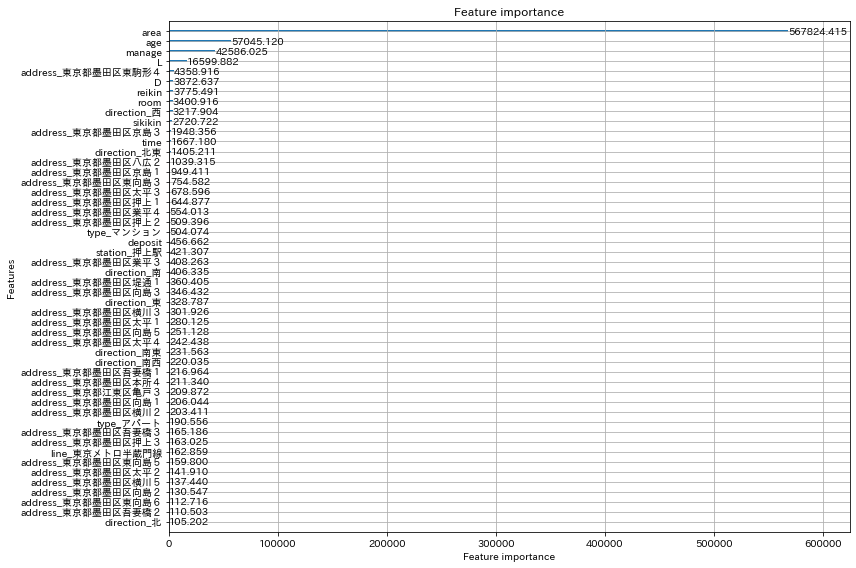

In [16]:
lgb.plot_importance(light, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()

In [17]:
df2 = pd.read_csv('data/suumo_dum.csv')

In [18]:
X2 = df2[[col for col in df2.columns if col not in ['price']]].drop("name",axis=1)

In [19]:
y2 = df2["price"]

In [20]:
pred2 = light.predict(X2)

In [21]:
prediction_s=pd.Series(pred2,name="prediction")
df2["difference"]=df2["price"]-prediction_s
df2["prediction"]=prediction_s
df2 = df2.reindex(columns=["name","price","prediction","difference"])
# お得物件top10を表示
df2.sort_values(by="difference",ascending=True).head(10)

,name,price,prediction,difference
734,第二ヤマノコーポ,13.0,16.538921,-3.538921
12765,東武亀戸線 東あずま駅 地下1地上14階建 築32年,13.0,16.047069,-3.047069
1506,東京メトロ半蔵門線 押上駅 7階建 築3年,11.2,14.131867,-2.931867
19150,京成押上線 押上駅 6階建 築26年,9.0,11.591070,-2.591070
7009,Bicyclette SUMIDA,9.8,12.260084,-2.460084
10123,グラントゥルース東向島,10.4,12.856840,-2.456840
7532,東武伊勢崎線 東向島駅 8階建 築43年,7.4,9.528730,-2.128730
10838,Forest Court,8.0,10.117605,-2.117605
8040,OPEN BLOOM SUMIDA YAHIRO 101号室,7.6,9.710484,-2.110484
9348,アイル東京スカイツリー弐番館,13.0,15.109700,-2.109700


In [22]:
train_pred = light.predict(X_train)

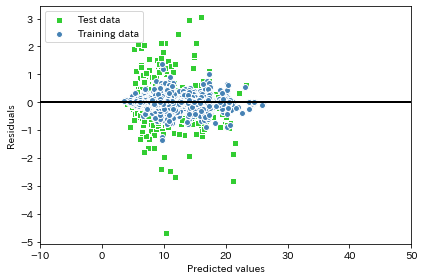

In [23]:

plt.scatter(pred,  pred - test_y,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.scatter(train_pred,  train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

In [24]:
# 検証データ
r2_score(test_y, pred)

0.9898665992358164

In [25]:
# 検証データ
mean_squared_error(test_y, pred)

0.0995662442697139

In [29]:
import math
math.sqrt(mean_squared_error(test_y, pred))

0.3155411926670017

In [26]:
pred3=light.predict(X_val)

In [27]:
r2_score(y_val, pred3)

0.9900114562121366

In [28]:
mean_squared_error(y_val, pred3)

0.09696182870986807